In [92]:
### Importing modules to be used

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# to get working day definition
import jpholiday

# to get time duration transformation from datetime to int
import datetime as dt

# to get a better view of deep differences on episode and show viewing percent
from matplotlib.colors import LogNorm



# Analysis

## Treatment of Data

1. Converting `view_start_time` and `view_end_time` to datetime format
2. Creating the `view_duration_time` the difference between `view_end_time` and `view_start_time`
3. Creating a boolean variable `is_weekend` to try to understand user loggin in behavior.
4. Transforming the `view_duration` from datetime type into seconds as integer
5. Encoding categorical data `episode_id, episode_type, show_id, user_id`

In [2]:
# reading the csv data file
df = pd.read_csv('data/data_sample.csv')

# transforming the view times and calculating the duration
df['view_start_time'] = pd.to_datetime(df['view_start_time'])
df['view_end_time'] = pd.to_datetime(df['view_end_time'])
df['view_duration'] = df['view_end_time'] - df['view_start_time']


In [3]:
df['log_date_weekday'] = pd.to_datetime(df['log_date'])
df['log_date_weekday'].head()

0   2024-02-01
1   2024-02-02
2   2024-02-03
3   2024-02-03
4   2024-02-03
Name: log_date_weekday, dtype: datetime64[ns]

In [4]:
# adding a new variable is_workday

# Function to determine if a date is a working weekday
def is_working_day(date):
    return date.weekday() < 5 and not jpholiday.is_holiday(date)

df['is_working_day'] = df['log_date_weekday'].apply(is_working_day)

In [5]:
df.head()

,Unnamed: 0,episode_type,episode_id,show_id,user_id,log_date,view_start_time,view_end_time,view_percent,log_day_sequence,view_duration,log_date_weekday,is_working_day
0,0,a,ep00000002,s00000002,uu00000002,2024-02-01,2024-02-01 12:13:10,2024-02-01 12:13:24,0.000,1,0 days 00:00:14,2024-02-01,True
1,1,a,ep00000002,s00000002,uu00000016,2024-02-02,2024-02-02 23:32:55,2024-02-02 23:34:01,9.091,1,0 days 00:01:06,2024-02-02,True
2,2,a,ep00000002,s00000002,uu00000049,2024-02-03,2024-02-03 12:37:43,2024-02-03 12:38:46,9.091,1,0 days 00:01:03,2024-02-03,False
3,3,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:59:06,2024-02-03 21:00:27,27.273,1,0 days 00:01:21,2024-02-03,False
4,4,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:56:40,2024-02-03 20:57:09,9.091,1,0 days 00:00:29,2024-02-03,False


In [12]:
# Dropping Unnamed column
df = df.drop(columns=['Unnamed: 0'])

In [9]:
#df_cleaned.to_csv('data/data_sample_improv.csv')

In [14]:
# Converting view_duration from datetime to int seconds
df['view_duration_seconds'] = df['view_duration'].dt.total_seconds().astype(int)

In [37]:
# encoding categorical data
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.drop(['log_date'])
df[categorical_cols] = df[categorical_cols].apply(lambda col: pd.factorize(col)[0])
df.head()

,episode_type,episode_id,show_id,user_id,log_date,view_start_time,view_end_time,view_percent,log_day_sequence,view_duration,log_date_weekday,is_working_day,view_duration_seconds
0,0,0,0,0,2024-02-01,2024-02-01 12:13:10,2024-02-01 12:13:24,0.000,1,0 days 00:00:14,2024-02-01,True,14
1,0,0,0,1,2024-02-02,2024-02-02 23:32:55,2024-02-02 23:34:01,9.091,1,0 days 00:01:06,2024-02-02,True,66
2,0,0,0,2,2024-02-03,2024-02-03 12:37:43,2024-02-03 12:38:46,9.091,1,0 days 00:01:03,2024-02-03,False,63
3,0,0,0,3,2024-02-03,2024-02-03 20:59:06,2024-02-03 21:00:27,27.273,1,0 days 00:01:21,2024-02-03,False,81
4,0,0,0,3,2024-02-03,2024-02-03 20:56:40,2024-02-03 20:57:09,9.091,1,0 days 00:00:29,2024-02-03,False,29


# Checking variables distributions for the `log_day_sequence == 1`

In [77]:
# Get data corresponding to users logging in once
logDay1 = df[df['log_day_sequence'] < 2]
logDay1

,episode_type,episode_id,show_id,user_id,log_date,view_start_time,view_end_time,view_percent,log_day_sequence,view_duration,log_date_weekday,is_working_day,view_duration_seconds
0,0,0,0,0,2024-02-01,2024-02-01 12:13:10,2024-02-01 12:13:24,0.000,1,0 days 00:00:14,2024-02-01,True,14
1,0,0,0,1,2024-02-02,2024-02-02 23:32:55,2024-02-02 23:34:01,9.091,1,0 days 00:01:06,2024-02-02,True,66
2,0,0,0,2,2024-02-03,2024-02-03 12:37:43,2024-02-03 12:38:46,9.091,1,0 days 00:01:03,2024-02-03,False,63
3,0,0,0,3,2024-02-03,2024-02-03 20:59:06,2024-02-03 21:00:27,27.273,1,0 days 00:01:21,2024-02-03,False,81
4,0,0,0,3,2024-02-03,2024-02-03 20:56:40,2024-02-03 20:57:09,9.091,1,0 days 00:00:29,2024-02-03,False,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23237,2,7270,107,998,2024-03-23,2024-03-23 21:14:35,2024-03-23 21:18:02,82.609,1,0 days 00:03:27,2024-03-23,False,207
23238,2,7271,107,998,2024-03-23,2024-03-23 21:21:01,2024-03-23 21:24:21,85.000,1,0 days 00:03:20,2024-03-23,False,200
23239,2,7272,107,998,2024-03-23,2024-03-23 21:07:27,2024-03-23 21:10:24,68.421,1,0 days 00:02:57,2024-03-23,False,177
23240,2,7273,107,998,2024-03-23,2024-03-23 21:24:22,2024-03-23 21:26:31,63.158,1,0 days 00:02:09,2024-03-23,False,129


## `view_duration_seconds` for `log_day_sequence == 1`

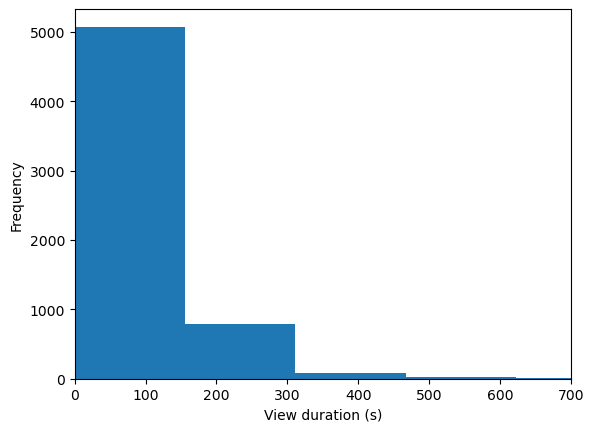

In [47]:
logDay1['view_duration_seconds'].plot(kind='hist', bins=100)

plt.xlim(0, 700)

plt.xlabel('View duration (s)')

plt.show()

## `episode_id` for `log_day_sequence == 1`

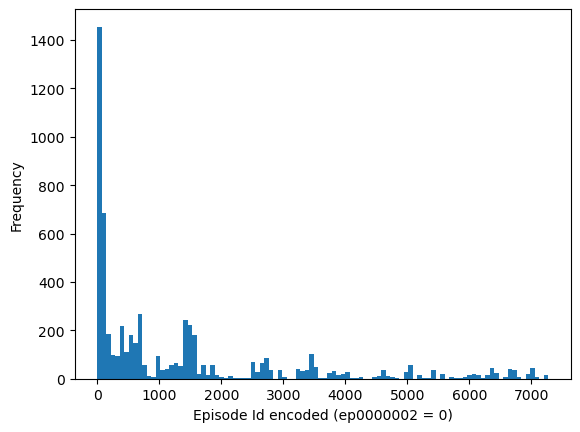

In [49]:
logDay1['episode_id'].plot(kind='hist', bins=100)

plt.xlabel('Episode Id encoded (ep0000002 = 0)')

plt.show()

## `episode_type` for `log_day_sequence == 1`

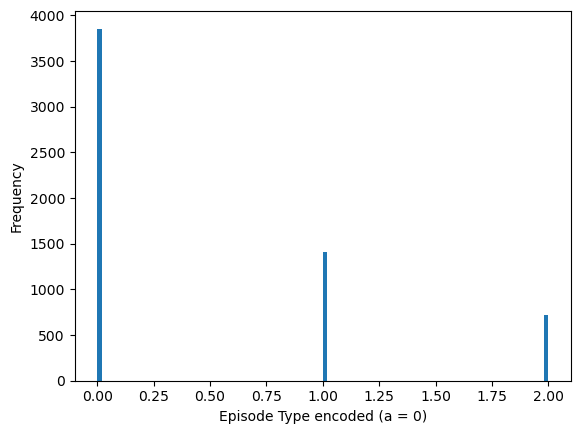

In [53]:
logDay1['episode_type'].plot(kind='hist', bins = 100)

plt.xlabel('Episode Type encoded (a = 0)')
plt.show()

## `show_id` for `log_day_sequence == 1`

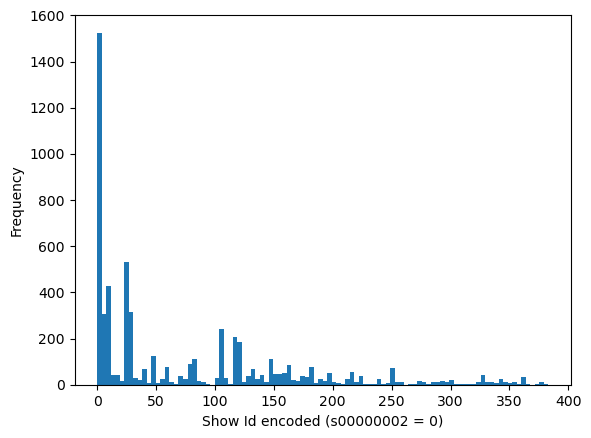

In [54]:
logDay1['show_id'].plot(kind='hist', bins=100)

plt.xlabel('Show Id encoded (s00000002 = 0)')

plt.show()

## `user_id` for `log_day_sequence == 1`

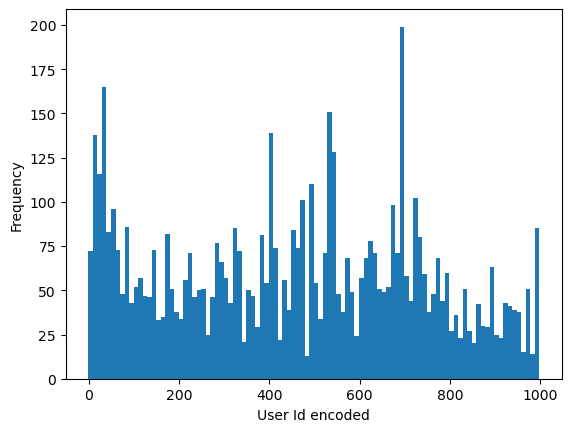

In [55]:
logDay1['user_id'].plot(kind='hist', bins = 100)

plt.xlabel('User Id encoded')

plt.show()

## `is_working_day` for `log_day_sequence == 1`

/tmp/ipykernel_28556/3805167155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logDay1['is_working_day'] = logDay1['is_working_day'].astype(int)


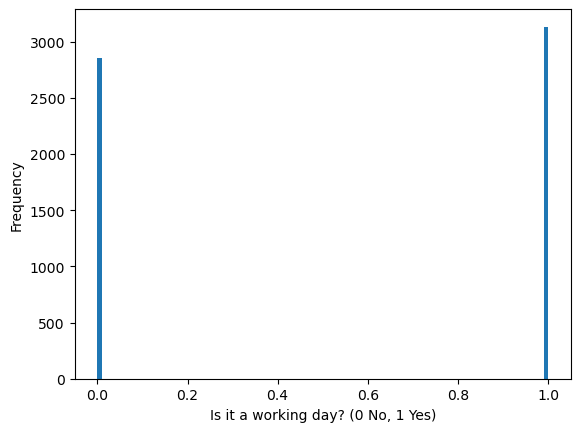

In [59]:
logDay1['is_working_day'] = logDay1['is_working_day'].astype(int)
logDay1['is_working_day'].plot(kind = 'hist', bins = 100)

plt.xlabel('Is it a working day? (0 No, 1 Yes)')

plt.show()

## Checking variables distributions for `log_day_sequence >= 2`

In [78]:
logDay2g = df[df['log_day_sequence'] >= 2]
logDay2g

,episode_type,episode_id,show_id,user_id,log_date,view_start_time,view_end_time,view_percent,log_day_sequence,view_duration,log_date_weekday,is_working_day,view_duration_seconds
17,0,0,0,15,2024-03-07,2024-03-07 14:06:04,2024-03-07 14:07:06,9.091,2,0 days 00:01:02,2024-03-07,True,62
18,0,0,0,15,2024-03-07,2024-03-07 15:20:34,2024-03-07 15:20:39,0.000,2,0 days 00:00:05,2024-03-07,True,5
20,0,0,0,17,2024-03-08,2024-03-08 16:42:01,2024-03-08 16:43:50,50.000,2,0 days 00:01:49,2024-03-08,True,109
22,0,0,0,19,2024-02-17,2024-02-17 17:01:59,2024-02-17 17:03:30,27.273,3,0 days 00:01:31,2024-02-17,False,91
25,0,0,0,22,2024-02-19,2024-02-19 00:47:21,2024-02-19 00:49:31,45.455,8,0 days 00:02:10,2024-02-19,True,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23228,2,7261,10,403,2024-03-24,2024-03-24 15:34:11,2024-03-24 15:35:36,30.435,3,0 days 00:01:25,2024-03-24,False,85
23229,2,7262,151,403,2024-03-24,2024-03-24 22:36:44,2024-03-24 22:38:31,40.909,3,0 days 00:01:47,2024-03-24,False,107
23230,2,7263,151,403,2024-03-24,2024-03-24 22:47:22,2024-03-24 22:48:27,25.000,3,0 days 00:01:05,2024-03-24,False,65
23231,2,7264,10,403,2024-03-24,2024-03-24 15:41:10,2024-03-24 15:43:30,30.303,3,0 days 00:02:20,2024-03-24,False,140


## `view_duration_seconds` for `log_day_sequence >= 2`

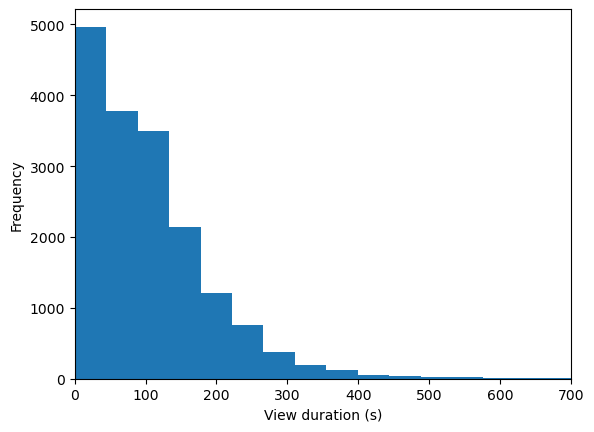

In [80]:
logDay2g['view_duration_seconds'].plot(kind='hist', bins=100)

plt.xlim(0, 700)

plt.xlabel('View duration (s)')

plt.show()

## `episode_id` for `log_day_sequence >=2 `

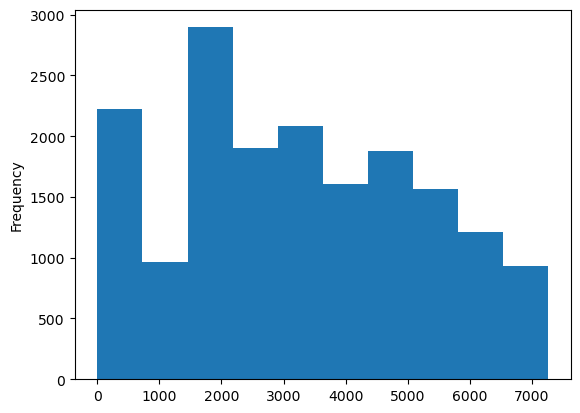

In [81]:
logDay2g['episode_id'].plot(kind='hist')

plt.show()
plt.figure(figsize = (10,6))
plt.hist(logDay1['episode_type'], bins = 5)
plt.hist(logDay2g['episode_type'], bins = 5, color = 'red', alpha = 0.6)

plt.xlabel('Episode Type encoded')
plt.ylabel('Volume')

plt.show()


## `episode_type` for `log_day_sequence >=2`

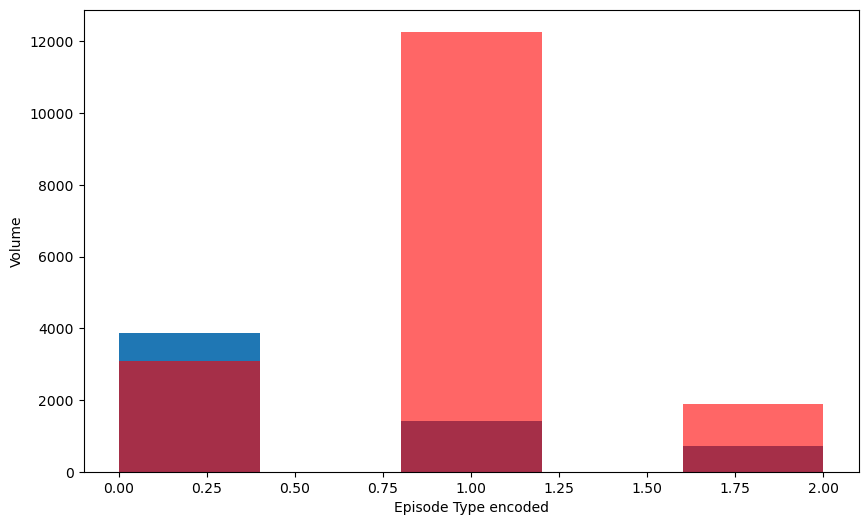

In [96]:
plt.figure(figsize = (10,6))
plt.hist(logDay1['episode_type'], bins = 5)
plt.hist(logDay2g['episode_type'], bins = 5, color = 'red', alpha = 0.6)

plt.xlabel('Episode Type encoded')
plt.ylabel('Volume')

plt.show()


## `show_id` for `log_day_sequence >= 2`

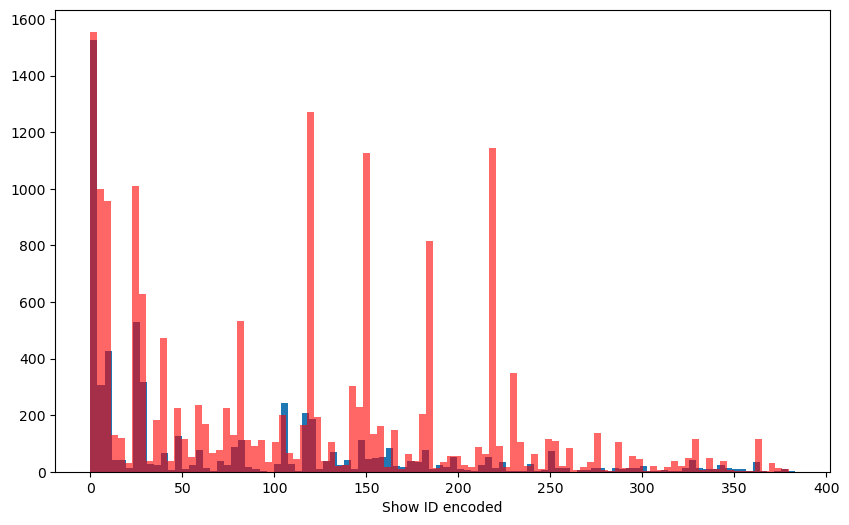

In [94]:
plt.figure(figsize = (10,6))
plt.hist(logDay1['show_id'], bins = 100)
plt.hist(logDay2g['show_id'], bins = 100, color = 'red', alpha = 0.6)

plt.xlabel('Show ID encoded')


plt.show()

## `user_id` for `log_day_sequence >= 2`

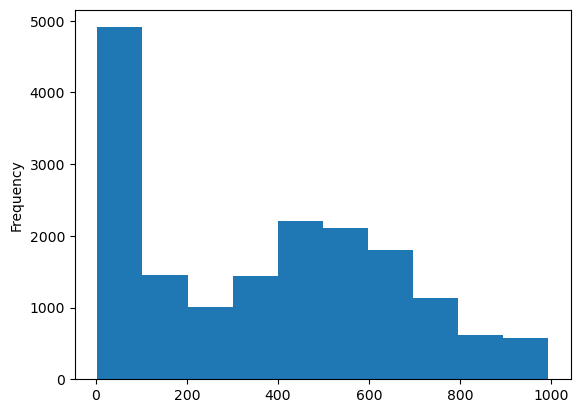

In [86]:
logDay2g['user_id'].plot(kind = 'hist')

plt.show()

## `is_working_day` for `log_day_sequence >=2`

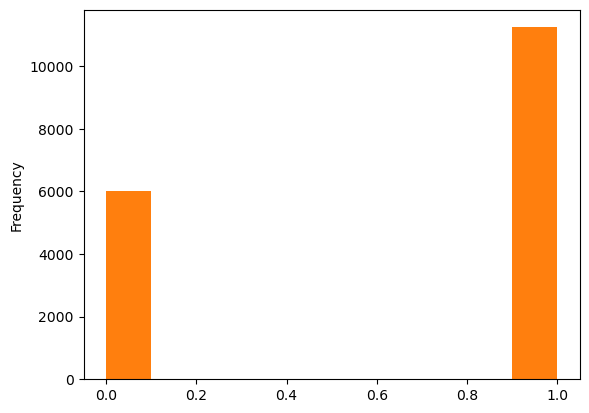

In [88]:
logDay2g['is_working_day'].astype(int).plot(kind='hist')

plt.show()

# Checking combinations of variables

## `episode_id` and `show_id`

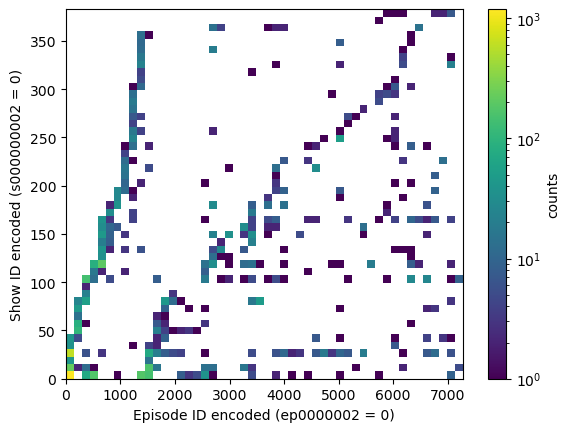

In [69]:

episodeIdLog1 = logDay1['episode_id'].to_numpy()
showIdLog1 = logDay1['show_id'].to_numpy()

plt.hist2d(episodeIdLog1, showIdLog1, bins=[50, 50], cmap='viridis', norm=LogNorm())

# Add labels and color bar
plt.xlabel('Episode ID encoded (ep0000002 = 0)')
plt.ylabel('Show ID encoded (s000000002 = 0)')
plt.colorbar(label='counts')

plt.show()

## Counting the episodes related with most sessions

In [89]:
# Segmentation: Split data into one-time users and multi-login users based on 'log_day_sequence'
one_time_users = df[df['log_day_sequence'] == 1]
multi_login_users = df[df['log_day_sequence'] > 1]

# Compare viewing behavior: average view percentage and number of sessions per user for both groups
one_time_viewing = one_time_users.groupby('user_id').agg(
    avg_view_percent=('view_percent', 'mean'),
    total_sessions=('log_day_sequence', 'size')
).mean()

multi_login_viewing = multi_login_users.groupby('user_id').agg(
    avg_view_percent=('view_percent', 'mean'),
    total_sessions=('log_day_sequence', 'size')
).mean()

one_time_viewing, multi_login_viewing


(avg_view_percent    26.046437
 total_sessions       5.989000
 dtype: float64,
 avg_view_percent    31.614251
 total_sessions      44.581395
 dtype: float64)